# Notebook #4: EDA: exploración de los datos

In [1]:
# Importamos las librerías que necesitamos

# Librerías de extracción de datos
# -----------------------------------------------------------------------

%load_ext autoreload
%autoreload 2

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

import sys
sys.path.append('../..')
from src import funciones as f
from src import soporte_prep as sp

import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)

In [2]:
df_2023 = pd.read_csv('../../Datos/datos_parquev/df_2023.csv', index_col=0)

# EDA hasta el 2023

### Cierre del Parque Vehicular en 2023

- **Total de vehículos**:  
  - Para el cierre de **2023**, el país contaba con un total de **5,810,888 vehículos** en todo el territorio.  
  - **Distribución por tipo de vehículo**:  
    - **Motocicletas**: **56%**  
    - **Automóviles**: **19.3%**  
    - **Jeepetas ('Jeep')**: **11.67%**  
    - **Otros**: Vehículos de carga, autobuses, máquinas pesadas, volteos, entre otros.

---

### Distribución del Parque Vehicular por Provincia

- **Concentración vehicular**:  
  - **Distrito Nacional**: **30%** (**29.90%**) de los vehículos.  
  - **Santo Domingo**: **16%**.  
  - **Santiago**: **7.93%**.  
  - **La Vega**: **5.38%**.  

  Esto indica que el **45%** de los vehículos se encuentra en la **Región Ozama** (Distrito Nacional y Santo Domingo).  
  Además, **Santiago** (Región Cibao Norte) y **La Vega** (Región Cibao Sur) contribuyen a elevar la presencia vehicular al **60%** del total en el país.  
  En el **top 5** también se encuentra la provincia de **San Cristóbal**, perteneciente a la **Región Valdesia** pero con cercanía geográfica a la Región Ozama.

---

### Categorías de Vehículos por Distrito Nacional

- **Distrito Nacional** concentra el mayor número de vehículos en todas las categorías:  
  - **Automóviles**: Más de **440,000** (**446,535**).  
  - **Autobuses**: Cerca de **50,000** (**49,784**).  
  - **Jeepetas ('Jeep')**: Aproximadamente la mitad de los automóviles (**227,089**).  
  - **Motocicletas**: El dato más alarmante, con casi un millón (**772,371**).

---

### Categorías de Vehículos por Santo Domingo

- En la provincia de **Santo Domingo**, los números también son elevados:  
  - **Automóviles**: **258,110**.  
  - **Jeepetas ('Jeep')**: **135,623**.  
  - **Motocicletas**: **413,411**.

En ambas provincias (Distrito Nacional y Santo Domingo), las **motocicletas** superan a los demás vehículos con un **ratio de casi 2:1**.  
Esto puede explicarse por:  
1. **Tamaño geográfico reducido**, pero con una alta concentración vehicular que genera embotellamientos.  
2. Las motocicletas se utilizan como **sistema económico**, ya que son un medio de transporte asequible para:  
   - Movilizar personas.  
   - Realizar entregas o mandados.  
3. El **costo de mantenimiento** de una motocicleta es considerablemente menor que el de un automóvil.  
4. La **falta de un sistema de transporte público eficiente** en República Dominicana, que limita las opciones de movilidad para las clases media-baja y baja.

---

### Cambios en el Top 5 por Categoría en 2023

Para **2023**, aunque las principales categorías de vehículos se mantienen, hay cambios en las provincias que ocupan el **top 5**:  
- **Autobuses**:  
  - **La Altagracia** ocupa el cuarto lugar, posiblemente debido al alto flujo de turistas que utilizan este medio de transporte.  
  - **La Vega** no aparece en esta categoría.  
- **Jeepetas ('Jeep')**:  
  - **Puerto Plata** entra en el quinto lugar, sustituyendo a **San Cristóbal**.  
- **Máquinas Pesadas**:  
  - **Duarte** reemplaza a **San Cristóbal** en esta categoría.


In [3]:
df_total_2023 = df_2023.iloc[[-1]].T

In [4]:
df_total_2023.rename(columns={32:'Cantidad'}, inplace=True)

In [5]:
df_total_2023 = df_total_2023.iloc[1:10]

In [6]:
df_total_2023['Cantidad'] = df_total_2023['Cantidad'].astype(int)

In [7]:
df_total_2023['Total_%'] = (df_total_2023['Cantidad'] / df_total_2023.iloc[-1].values[0]) * 100

In [8]:
df_total_2023.sort_values(by='Cantidad', ascending=False)

,Cantidad,Total_%
total,5810888,100.00
motocicletas,3281018,56.46
automóviles,1122336,19.31
jeep,678470,11.68
carga,521278,8.97
autobuses,130691,2.25
máquinas pesadas,27582,0.47
volteo,25545,0.44
otros,23968,0.41


In [9]:
columnas_int = df_2023.iloc[:,1:10].columns.tolist()
columnas_int_sin_total = df_2023.iloc[:,1:9].columns.tolist()
df_2023[columnas_int] = df_2023[columnas_int].astype('int64')

In [10]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 0 to 32
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   provincia         33 non-null     object 
 1   automóviles       33 non-null     int64  
 2   autobuses         33 non-null     int64  
 3   jeep              33 non-null     int64  
 4   carga             33 non-null     int64  
 5   motocicletas      33 non-null     int64  
 6   volteo            33 non-null     int64  
 7   máquinas pesadas  33 non-null     int64  
 8   otros             33 non-null     int64  
 9   total             33 non-null     int64  
 10  total %           33 non-null     float64
dtypes: float64(1), int64(9), object(1)
memory usage: 3.1+ KB


In [11]:
df_2023[['provincia', 'total', 'total %']].sort_values(by='total', ascending=False)[1:11]

,provincia,total,total %
4,Distrito Nacional,1737745,29.90
30,Santo Domingo,933901,16.07
28,Santiago,461275,7.94
14,La Vega,313193,5.39
23,San Cristóbal,256841,4.42
12,La Altagracia,186133,3.20
5,Duarte,174479,3.00
13,La Romana,169737,2.92
21,Puerto Plata,154919,2.67
26,San Pedro de Macorís,141045,2.43


In [12]:
df_2023 = df_2023.iloc[:32] # de esta forma quito la última fila de total

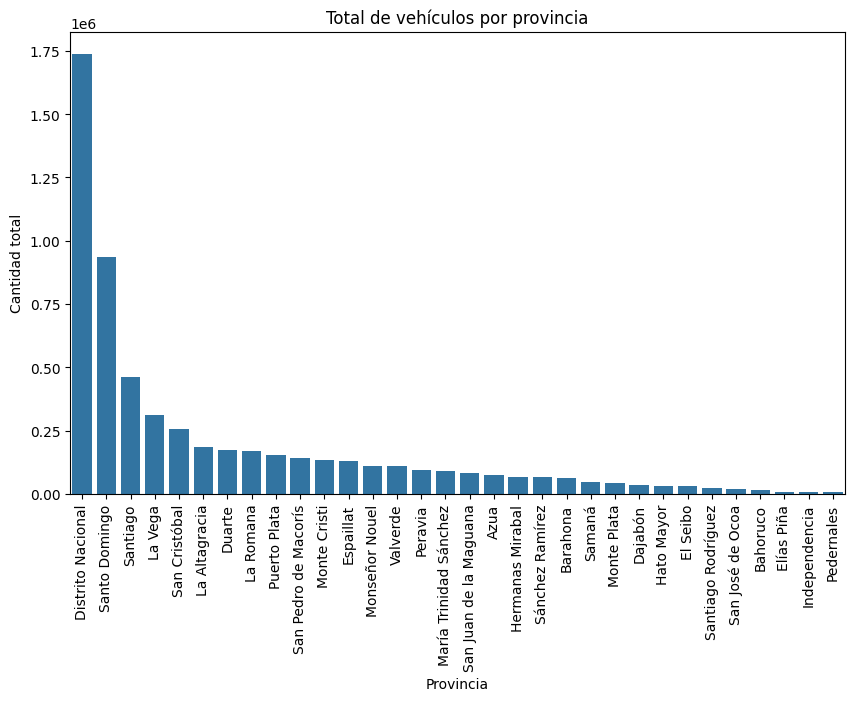

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='provincia', y= 'total', data=df_2023, order=df_2023.sort_values(by='total', ascending=False)['provincia'])
plt.title('Total de vehículos por provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad total')
plt.xticks(rotation=90)
plt.show()

Vemos como se eleva por encima de las demás el Distrito Nacional, donde se concentra el 30% del parque vehicular del país.

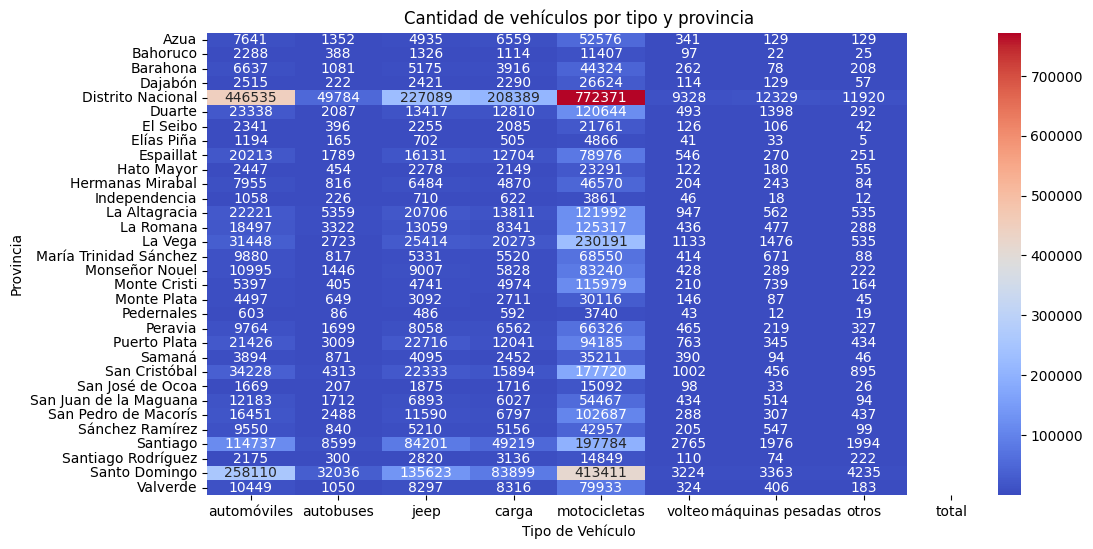

In [14]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_2023[columnas_int_sin_total], annot=True, fmt='d', cmap='coolwarm', xticklabels=columnas_int, yticklabels=df_2023['provincia'])
plt.title('Cantidad de vehículos por tipo y provincia')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Provincia')
plt.show()

### Observaciones por Tipo de Vehículo

(Cabe destacar que Santo Domingo es **10 veces más grande** que el Distrito Nacional).

- **Automóviles**:  
  - Solo en el **Distrito Nacional**, **Santo Domingo** y **Santiago** se superan las **100,000 unidades**.

- **Autobuses**:  
  - No poseen una gran concentración destacable.  
  - Las provincias con mayor concentración son el **Distrito Nacional** y **Santo Domingo**, lo cual es lógico considerando que estas son dos de las provincias con mayor población y demanda de movilización de personas.

- **Jeeps**:  
  - Tienen una participación similar a la categoría de autobuses.  
  - Predominan en el **Distrito Nacional**, con más de **200,000 unidades**.  
  - Solo **Santo Domingo** supera el centenar de miles, seguido de **Santiago**, con algo más de **80,000 unidades**.

- **Vehículos de carga**:  
  - Siguen el mismo patrón donde el **Distrito Nacional** supera a las demás provincias.  
  - Esto tiene sentido debido al alto movimiento de mercancías pesadas y construcciones que requieren movilización constante de materiales.

- **Motocicletas**:  
  - Existe una **diferencia notable** entre el Distrito Nacional y las demás provincias, aunque es más frecuente encontrar provincias con más de **100,000 unidades** de motocicletas.  
  - Provincias destacadas con más de 100,000 unidades:  
    - **La Romana**, **La Altagracia**, **Duarte**, **Monte Cristi** y **San Pedro de Macorís**.  
  - Solo **tres provincias** tienen menos de **10,000 unidades**, lo cual refleja la preferencia nacional por este medio de transporte debido a:  
    - Su rapidez y facilidad de movilidad.  
    - Menores gastos en comparación con vehículos de cuatro ruedas.


In [15]:
df_2023[['provincia', 'automóviles']].sort_values(by='automóviles', ascending=False).head()

,provincia,automóviles
4,Distrito Nacional,446535
30,Santo Domingo,258110
28,Santiago,114737
23,San Cristóbal,34228
14,La Vega,31448


In [16]:
df_2023[['provincia', 'motocicletas']].sort_values(by='motocicletas', ascending=False)[:10]

,provincia,motocicletas
4,Distrito Nacional,772371
30,Santo Domingo,413411
14,La Vega,230191
28,Santiago,197784
23,San Cristóbal,177720
13,La Romana,125317
12,La Altagracia,121992
5,Duarte,120644
17,Monte Cristi,115979
26,San Pedro de Macorís,102687


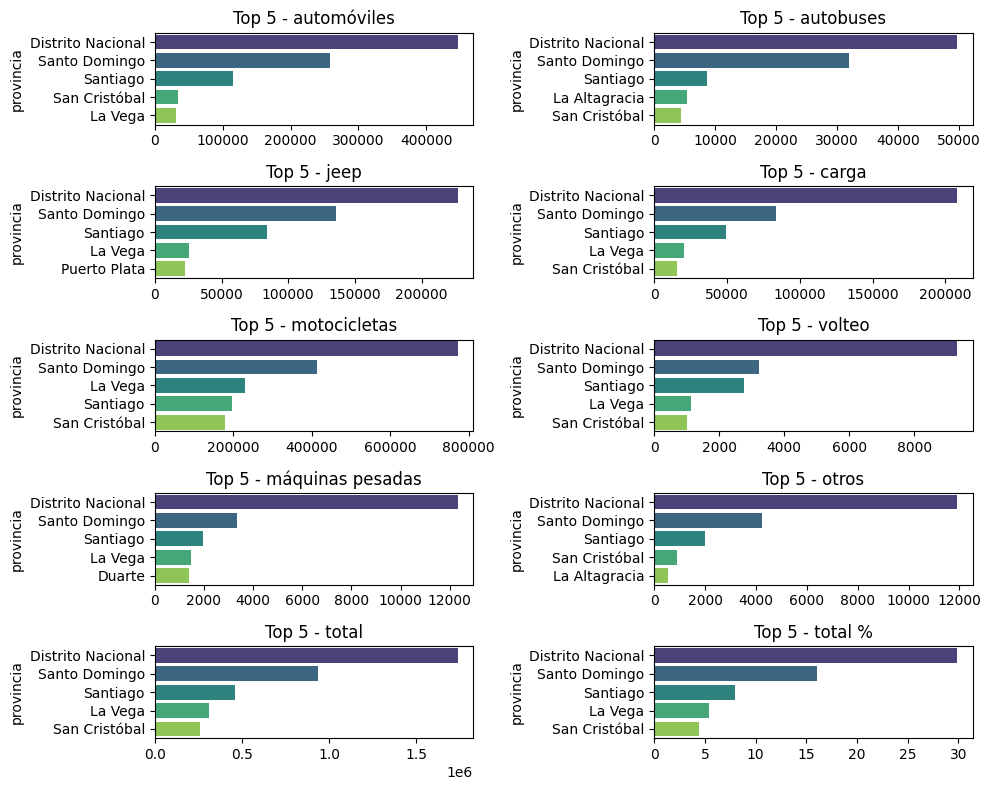

In [17]:
f.plot_top_numericas(dataframe=df_2023, columna_categoria='provincia', top_n=5)

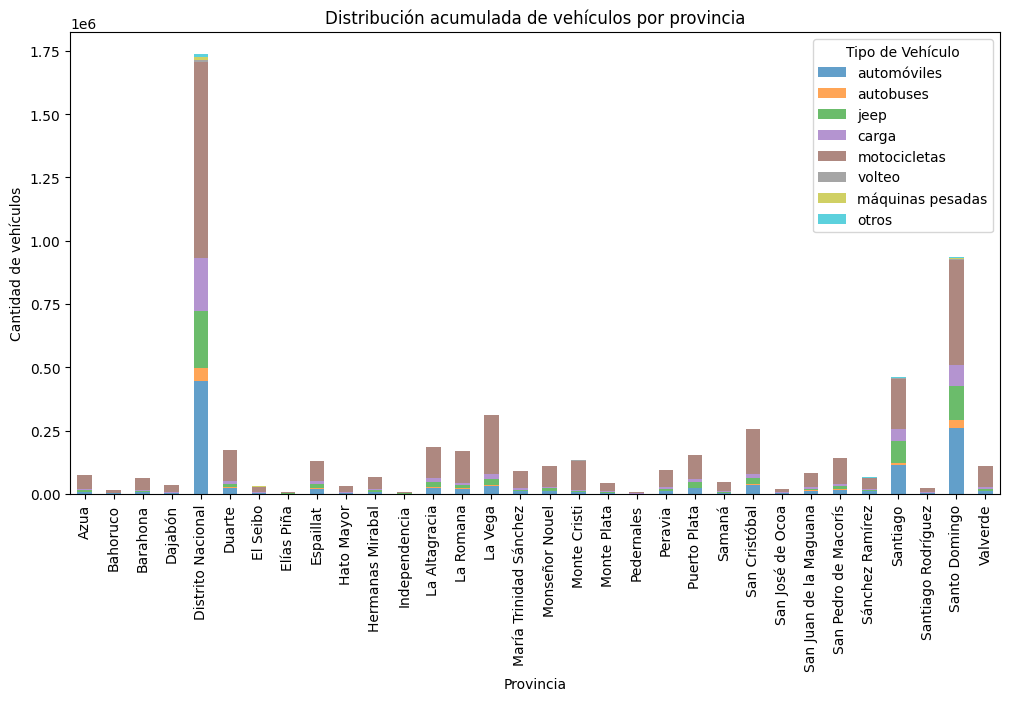

In [18]:
df_2023[columnas_int_sin_total].plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10', alpha=0.7)
plt.title('Distribución acumulada de vehículos por provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de vehículos')
plt.xticks(ticks=range(len(df_2023['provincia'])), labels=df_2023['provincia'], rotation=90)
plt.legend(title='Tipo de Vehículo')
plt.show()

### EDA Histórico Parque Vehicular

### Avance Histórico de los Medios de Transporte (1998-2024)

Se destacan tres categorías principales: **Automóviles**, **Jeep** y **Motocicletas**.

- **Motocicletas**:  
  - En **1998**, había **271,753 unidades** registradas.  
  - Para **2024**, la cifra superó los **3 millones** (**3,509,088**), con un aumento de **3,237,335 unidades**.  
  - Este es el grupo con **mayor presencia** entre los medios de transporte en la República Dominicana.

- **Automóviles**:  
  - En **1998**, había menos de **medio millón** de unidades (**380,382**).  
  - Para **2024**, la cifra había aumentado a **1,155,632** unidades.  
  - Aunque el crecimiento ha sido gradual, no ha sido tan marcado como el de las motocicletas.

- **Jeep**:  
  - En **1998**, la cantidad no alcanzaba **50,000 unidades** registradas (**39,535**), ocupando el cuarto lugar detrás de los vehículos de carga.  
  - Para **2024**, el número se ha elevado por mucho, alcanzando **731,357 unidades** y superando los vehículos de carga y así se convirtió en la tercera categoría con más presencia en el país.

---

### Crecimiento del Parque Vehicular por Décadas

- **1998-2000**:  
  - Entos años fueron muy importantes ya que registran cuando se supera el **millón** de unidades, pasando de **936,083** a **1,294,998**.

- **2001-2010**:  
  - En la primera década documentada, el número de vehículos aumentó en casi **un millón**, pasando de **1,436,165** a **2,734,740**.

- **2011-2020**:  
  - En esta década, se observa un incremento de **2 millones** en tan solo 10 años.  
  - En **2012**, se superaron los **3 millones** de vehículos registrados.  
  - Para **2017**, la cifra superó los **4 millones**, y la década cerró con **4,842,367 vehículos**.

- **2021-2024**:  
  - En el primer año de la década, **2021**, se alcanzó un nuevo hito al superar los **5 millones** de vehículos.  
  - En apenas tres años más, de **2022 a 2024**, se alcanzaron los **6 millones** de unidades llegando a **6,160,988**

---


In [23]:
df_historico = pd.read_csv('../../Datos/datos_parquev/registro_historico_anios_cat.csv', index_col=0)

In [24]:
total_history = df_historico.iloc[[-1]]

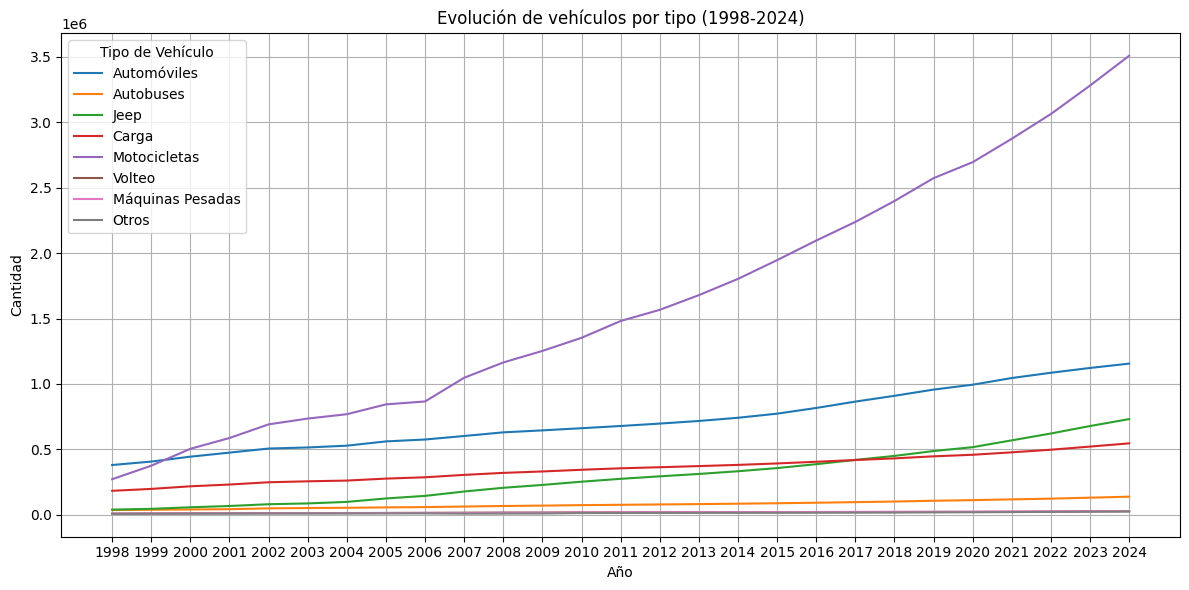

In [25]:
# cambio el formato al DataFrame a formato largo
df_long = df_historico[:8].melt(id_vars='Tipo', 
                            var_name='Año', 
                            value_name='Cantidad')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x='Año', y='Cantidad', hue='Tipo')
plt.title('Evolución de vehículos por tipo (1998-2024)')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.legend(title='Tipo de Vehículo')
plt.grid(True)
plt.tight_layout()
plt.show()

### Observaciones del Crecimiento Vehicular

Se puede visualizar el aumento que viene desde años anteriores, destacando las siguientes observaciones:

- **Motocicletas**:  
  - Han alcanzado más de **3.5 millones de unidades** para noviembre de **2024**.

- **Automóviles**:  
  - Aunque años atrás tenía un crecimiento con ímpetu, después de cruzar el **1,000,000 unidades** su despegue se ha visto menos disparado que en periodos anteriores.

- **Jeep**:  
  - Han superado un nuevo hito, cruzando la barrera de las **700,000 unidades** y dejando en cuarto lugar a los vehículos de carga.

- **Otras categorías**:  
  - Las demás categorías presentan crecimientos poco significativos en el tiempo por lo que se mantienen un crecimiento visiblemente más rezagado pero constante.


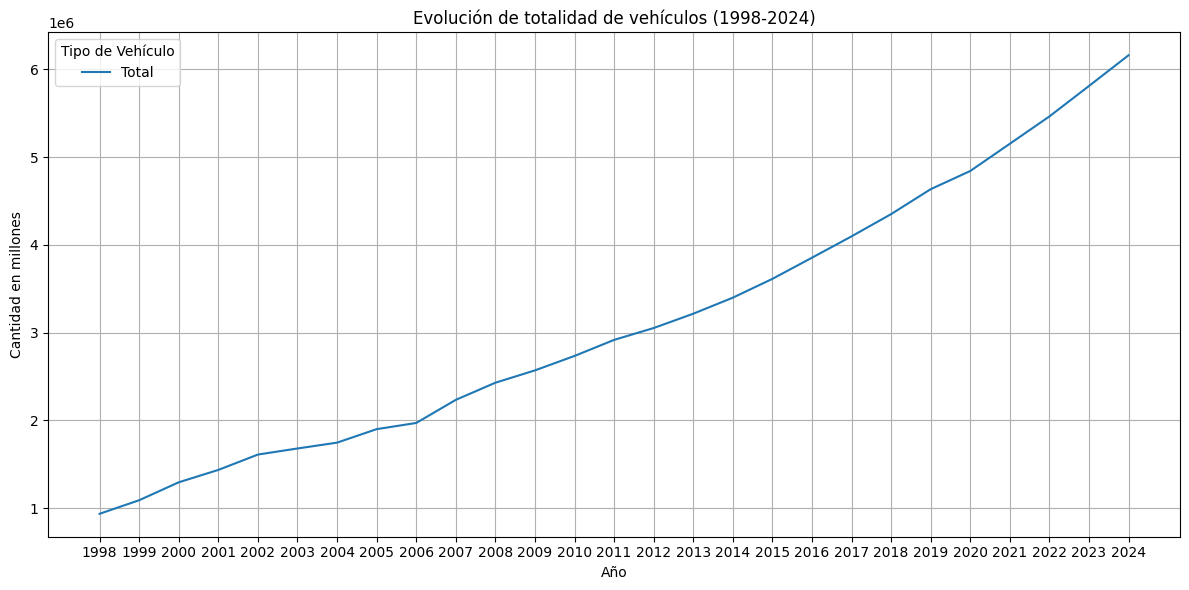

In [26]:
# aqui solo me quedo con el formato largo de la fila total
df_long_total = total_history[-1:].melt(id_vars='Tipo', 
                            var_name='Año', 
                            value_name='Cantidad')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long_total, x='Año', y='Cantidad', hue='Tipo')
plt.title('Evolución de totalidad de vehículos (1998-2024)')
plt.xlabel('Año')
plt.ylabel('Cantidad en millones')
plt.legend(title='Tipo de Vehículo')
plt.grid(True)
plt.tight_layout()
plt.show()

### Insights sobre la Evolución Total de Vehículos (1998-2024)

1. **Crecimiento constante**:  
   - La cantidad total de vehículos ha mostrado un crecimiento sostenido desde **1998** hasta **2024**, reflejando un aumento continuo en la motorización del país.

2. **Incrementos significativos**:  
   - A partir de **2005**, el crecimiento se acelera notablemente, lo que podría deberse a una mayor accesibilidad económica a los vehículos o cambios en las políticas de transporte.

3. **Hitos importantes**:  
   - **2012**: Se supera la barrera de los **3 millones** de vehículos.  
   - **2017**: Se alcanza y supera la marca de los **4 millones** de vehículos.  
   - **2020**: Se logra un nuevo hito al superar los **5 millones**.  
   - **2024**: El total se aproxima o supera los **6 millones** de vehículos.

4. **Tendencia a largo plazo**:  
   - La gráfica sugiere que la cantidad de vehículos continuará aumentando significativamente si no se implementan medidas para diversificar los medios de transporte o mejorar el transporte público.

5. **Posible impacto**:  
   - Este incremento continuo podría tener consecuencias importantes, tales como:
     - **Congestión vehicular**.  
     - **Aumento en las emisiones de carbono**.  
     - **Presión sobre la infraestructura vial**.
